# Importing Libraries

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mne.filter import notch_filter

from sklearn import preprocessing
from sklearn.decomposition import FastICA, PCA
#https://www.physionet.org/pn4/eegmmidb/

%matplotlib inline  


# Reading raw data and picking the relevant channels

In [4]:
#raw = mne.io.read_raw_ctf('MNI0041_MEGs0003_resting_20130416_03_AUX.ds', preload=True)


In [5]:
raw = mne.io.read_raw_edf("S001R02.edf", preload=True)

Extracting edf Parameters from S001R02.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.


In [6]:
print(raw.ch_names)

[u'Fc5.', u'Fc3.', u'Fc1.', u'Fcz.', u'Fc2.', u'Fc4.', u'Fc6.', u'C5..', u'C3..', u'C1..', u'Cz..', u'C2..', u'C4..', u'C6..', u'Cp5.', u'Cp3.', u'Cp1.', u'Cpz.', u'Cp2.', u'Cp4.', u'Cp6.', u'Fp1.', u'Fpz.', u'Fp2.', u'Af7.', u'Af3.', u'Afz.', u'Af4.', u'Af8.', u'F7..', u'F5..', u'F3..', u'F1..', u'Fz..', u'F2..', u'F4..', u'F6..', u'F8..', u'Ft7.', u'Ft8.', u'T7..', u'T8..', u'T9..', u'T10.', u'Tp7.', u'Tp8.', u'P7..', u'P5..', u'P3..', u'P1..', u'Pz..', u'P2..', u'P4..', u'P6..', u'P8..', u'Po7.', u'Po3.', u'Poz.', u'Po4.', u'Po8.', u'O1..', u'Oz..', u'O2..', u'Iz..', 'STI 014']


In [10]:
print (raw)
x= raw.pick_channels([u'O1..'])

raw.notch_filter(x)

<RawEDF  |  S001R02.edf, n_channels x n_times : 65 x 9760 (61.0 sec), ~5.0 MB, data loaded>


ValueError: cannot copy sequence with size 9760 to array axis with dimension 1

# Checking what the actual data looks like

In [1]:
raw.plot()

NameError: name 'raw' is not defined

In [33]:
print(raw.pick_channels([u'O1..']))
X = raw._data.T #Transposing the data to use it in the ICA


<RawEDF  |  S001R02.edf, n_channels x n_times : 1 x 9760 (61.0 sec), ~85 kB, data loaded>


# Plotting Raw Data

In [10]:
raw.plot(n_channels=3, duration=1, start=60)

# Running FastICA and PCA on the transposed data

In [34]:
ica = FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_

In [35]:
pca = PCA()
H = pca.fit_transform(X)

# Plotting the ICA

In [40]:
plt.figure()
plt.plot(S_,"g")
plt.plot(X)
plt.show()

In [29]:
S_.shape

(9760L, 65L)

In [44]:
#fft 
import scipy 
from scipy import fft


In [45]:
X.shape

(9760L, 1L)

In [71]:
f = scipy.fft(X)
f_abs = abs(f)

t = scipy.linspace(0,4000,len(f_abs))
freqs = scipy.fftpack.fftfreq(f_abs.size, t[1]-t[0])


C:\Users\Sydney\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


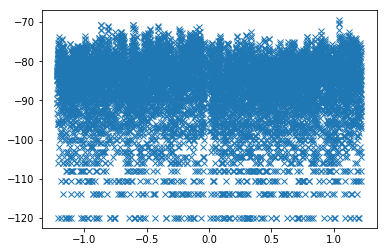

In [75]:
#plt.plot(X)
#plt.plot(f_abs)
plt.plot(freqs,20*scipy.log10(f),'x')